# UFRN Analytics

### Análise sobre os dados de Pesquisa

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import re
%matplotlib inline

In [3]:
names = ['servidores', 'docentes', 'funcoes', 'extensao', 'pesquisa', 'pesquisadores', 'bolsistas_ic', 'grupos_pesquisa']
urls = {
    'servidores': 'http://dados.ufrn.br/dataset/32b14393-fd81-4463-9184-9cce9d7c18aa/resource/8220567a-fc10-4d38-9377-32b9b675bc4a/download/servidores.csv',
    'docentes': 'http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/b29547fa-2c72-4e0d-8ab8-9a02494ea0bc/download/docentes.csv',
    'funcoes': 'http://dados.ufrn.br/dataset/b8c62810-0ec4-4412-ad3b-52105dc8b391/resource/6f20b65d-a93c-4b9b-8ad2-9edf7651abb3/download/funcoesgratificadas.csv',
    'extensao': 'http://dados.ufrn.br/dataset/92e04e19-3d5d-4c49-bd3e-a9f3778e9a08/resource/eeebb47d-9e02-4441-8eff-90a8275682e6/download/relatorioextensaoportaltransparencia.csv',
    'pesquisa': 'http://dados.ufrn.br/dataset/e48162fa-0668-4098-869a-8aacfd177f9f/resource/a53502a4-aa50-442d-8166-9365358e9234/download/projetospesquisa.csv',
    'pesquisadores': 'http://dados.ufrn.br/dataset/d92811a3-5555-4b37-beea-525bb2827cae/resource/806ce3a0-a5a9-42d8-97de-39442ae7d749/download/pesquisadores.csv',
    'bolsistas_ic': 'http://dados.ufrn.br/dataset/81608a4d-c76b-4758-a8d8-54be32209833/resource/0d6c78f8-bca2-43ed-97eb-81fd710b5720/download/bolsistasiniciacaocientifica.csv',
    'grupos_pesquisa': 'http://dados.ufrn.br/dataset/e8835880-9cc8-4d36-b578-af09d16fa5e4/resource/4d7b4cc6-9c45-4d89-a3e5-28131197438e/download/grupospesquisa.csv',
       }
datasets = {}
for name in names:
    fileobj = urllib.request.urlopen(urls[name])
    datasets[name] = pd.read_csv(fileobj, delimiter=';')

Grupos de Pesquisa

In [4]:
datasets['grupos_pesquisa'].head()

,codigo,base_pesquisa,coordenador,area_conhecimento_cnpq,situacao
0,GEC385-15,ACEFALO (Agenciamento Coletivo de Estudos em F...,EDUARDO ANIBAL PELLEJERO,Filosofia,EM CONSOLIDACÃO
1,GED239-10,Ações promocionais e de atenção a grupos human...,FRANCISCO ARNOLDO NUNES DE MIRANDA,Ciências da Saúde,EM CONSOLIDACÃO
2,GCG111-04,AGROECOLOGIA E DESENVOLVIMENTO SUSTENTÁVEL NO ...,MAGDA MARIA GUILHERMINO,Zootecnia,CONSOLIDADO
3,GCD109-01,"ALIMENTOS, NUTRIÇÃO E SAÚDE",KARINE CAVALCANTI MAURICIO DE SENA EVANGELISTA,Nutrição,CONSOLIDADO
4,GEA282-12,"Alterações morfológicas, modulação farmacêutic...",RAIMUNDO FERNANDES DE ARAUJO JUNIOR,Morfologia,EM CONSOLIDACÃO


In [5]:
print (datasets['grupos_pesquisa']['area_conhecimento_cnpq'].unique())
print (datasets['grupos_pesquisa']['situacÃo'].unique())

['Filosofia' 'Ciências da Saúde' 'Zootecnia' 'Nutrição' 'Morfologia'
 'Turismo' 'Lingüística, Letras e Artes' 'Engenharia Química'
 'Ciências Agrárias' 'Ciências Exatas e da Terra' 'Enfermagem'
 'Educação Física' 'Engenharia Elétrica' 'Ciências Sociais Aplicadas'
 'Ciências Biológicas' 'Ciências Humanas' 'Probabilidade e Estatística'
 'Farmácia' 'Bioquímica' 'Engenharia de Materiais e Metalúrgica'
 'Comunicação' 'Lingüística' 'Engenharia de Produção' 'Sociologia'
 'Engenharias' 'Direito' 'Administração' 'Educação' 'História'
 'Saúde Coletiva' 'Medicina' 'Geografia' 'Desenho Industrial' 'Ecologia'
 'Zoologia' 'Biologia Geral' 'Engenharia Mecânica' 'Letras'
 'Ciência Política' 'Planejamento Urbano e Regional' 'Agronomia'
 'Arquitetura e Urbanismo' 'Multidisciplinar' 'Geociências'
 'Engenharia Sanitária' 'Antropologia' 'Odontologia' 'Serviço Social'
 'Ciência da Computação' 'Química' 'Engenharia Agrícola'
 'Recursos Florestais e Engenharia Florestal' 'Psicologia' 'Artes'
 'Economia' 'Fisi

KeyError: 'situacÃo'

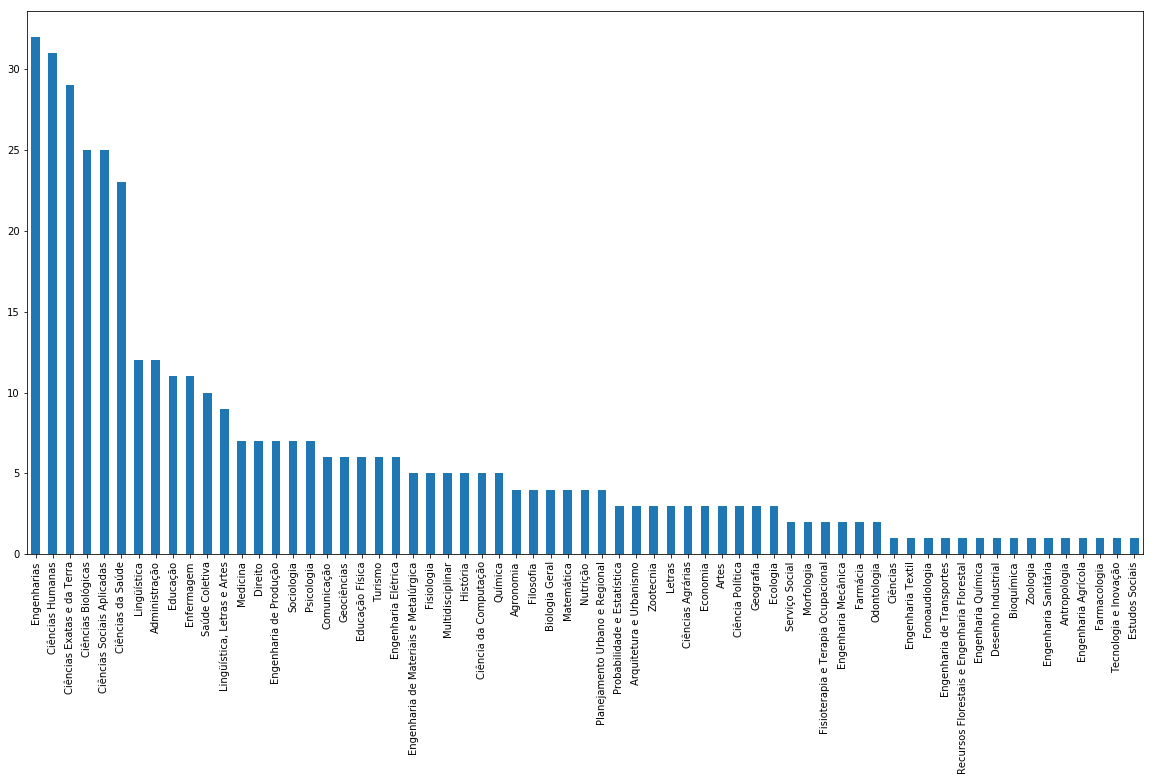

In [14]:
datasets['grupos_pesquisa']['area_conhecimento_cnpq'].value_counts().plot(kind='bar', figsize=(20,10))

In [22]:
datasets['grupos_pesquisa'].loc[datasets['grupos_pesquisa']['area_conhecimento_cnpq']=='Engenharias',:]

,codigo,base_pesquisa,coordenador,area_conhecimento_cnpq,situacao,ano
49,GCG161-05,CONFORTO AMBIENTAL E EFICIÊNCIA ENERGÉTICA,VIRGINIA MARIA DANTAS DE ARAUJO,Engenharias,CONSOLIDADO,2005
55,GCG017-00,CONTROLE E ACIONAMENTO DE SISTEMAS,ANDRE LAURINDO MAITELLI,Engenharias,CONSOLIDADO,2000
91,GEG218-09,ENERGIA ALTERNATIVA E FENÔMENOS DE TRANSPORTE,EDSON LEANDRO DE OLIVEIRA,Engenharias,EM CONSOLIDACÃO,2009
94,GCG027-00,ENGENHARIA DA MOBILIDADE,CLEITON RUBENS FORMIGA BARBOSA,Engenharias,CONSOLIDADO,2000
95,GCG152-04,Engenharia de Bioprocessos,EVERALDO SILVINO DOS SANTOS,Engenharias,CONSOLIDADO,2004
96,GCG033-00,ENGENHARIA DE CUSTOS E PROCESSOS,PAGANDAI VAITHIANATHAN PANNIR SELVAM,Engenharias,CONSOLIDADO,2000
112,GCG139-02,ESTRATÉGIA E GESTÃO DE OPERAÇÕES DE NEGÓCIOS,RUBENS EUGENIO BARRETO RAMOS,Engenharias,CONSOLIDADO,2002
119,GEG233-10,Estudos Avançados em Petróleo e Gás Natural,WILSON DA MATA,Engenharias,EM CONSOLIDACÃO,2010
159,GCG020-95,"GEOTECNIA, USOS DO SOLO E MEIO AMBIENTE",OLAVO FRANCISCO DOS SANTOS JUNIOR,Engenharias,CONSOLIDADO,1995
167,GEG274-11,GppCom - Grupo de Pesquisa em Prototipagem Ráp...,VICENTE ANGELO DE SOUSA JUNIOR,Engenharias,EM CONSOLIDACÃO,2011


In [7]:
def extract_year(data):
    year = int(re.findall("\-[0-9][0-9]", data)[0].replace('-',''))
    if year < 60:
        year = 2000+year
    else: 
        year = 1900+year
    return year

datasets['grupos_pesquisa']['ano'] = datasets['grupos_pesquisa']['codigo'].apply(lambda x: extract_year(x))
datasets['grupos_pesquisa'].head()

,codigo,base_pesquisa,coordenador,area_conhecimento_cnpq,situacao,ano
0,GEC385-15,ACEFALO (Agenciamento Coletivo de Estudos em F...,EDUARDO ANIBAL PELLEJERO,Filosofia,EM CONSOLIDACÃO,2015
1,GED239-10,Ações promocionais e de atenção a grupos human...,FRANCISCO ARNOLDO NUNES DE MIRANDA,Ciências da Saúde,EM CONSOLIDACÃO,2010
2,GCG111-04,AGROECOLOGIA E DESENVOLVIMENTO SUSTENTÁVEL NO ...,MAGDA MARIA GUILHERMINO,Zootecnia,CONSOLIDADO,2004
3,GCD109-01,"ALIMENTOS, NUTRIÇÃO E SAÚDE",KARINE CAVALCANTI MAURICIO DE SENA EVANGELISTA,Nutrição,CONSOLIDADO,2001
4,GEA282-12,"Alterações morfológicas, modulação farmacêutic...",RAIMUNDO FERNANDES DE ARAUJO JUNIOR,Morfologia,EM CONSOLIDACÃO,2012


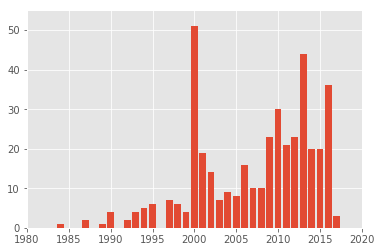

In [23]:
plt.style.use('ggplot')
plt.bar(datasets['grupos_pesquisa']['ano'].value_counts().keys(), datasets['grupos_pesquisa']['ano'].value_counts().get_values())
plt.xlim(1980, 2020)
plt.ylim(0, 55)
plt.show()


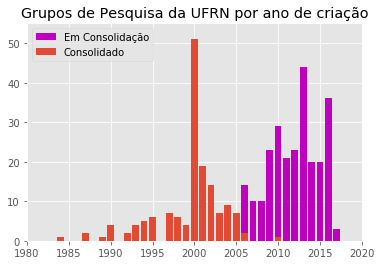

In [27]:
plt.bar(datasets['grupos_pesquisa'][datasets['grupos_pesquisa']['situacao']=='EM CONSOLIDACÃO']['ano'].value_counts().keys(), datasets['grupos_pesquisa'][datasets['grupos_pesquisa']['situacao']=='EM CONSOLIDACÃO']['ano'].value_counts().get_values(), color='m', label='Em Consolidação')
plt.bar(datasets['grupos_pesquisa'][datasets['grupos_pesquisa']['situacao']=='CONSOLIDADO']['ano'].value_counts().keys(), datasets['grupos_pesquisa'][datasets['grupos_pesquisa']['situacao']=='CONSOLIDADO']['ano'].value_counts().get_values(), label='Consolidado')
plt.legend(loc = 'upper left')
plt.title('Grupos de Pesquisa da UFRN por ano de criação')
plt.xlim(1980, 2020)
plt.ylim(0, 55)
plt.show()


A UFRN registra a primeira criação de um grupo de pesquisa no ano de 1984.
O ano 2000 apresenta o maior número de novos grupos criados: 51.
Em 1985, 1986, 1988 e 1996 não foi registrada a criação de novos grupos.
Entre 2009 e 2016, o número de grupos criados anualmente 
Todos os grupos de pesquisa criados até o ano de 2005 tem status "consolidado".
A base de dados não permite avaliar o tempo que grada grupo levou para obter esse status, já que não guarda a informação sobre o ano em que o grupo passou da situação "em consolidação" para "consolidado".

Quanto aos grupos criados a partir de 2006, vê-se que a grande maioria possui status "em consolidação", mas três já obtiveram o status "consolidado". Foram eles:



In [116]:
datasets['grupos_pesquisa'][((datasets['grupos_pesquisa']['ano']==2006) | (datasets['grupos_pesquisa']['ano']==2010)) & (datasets['grupos_pesquisa']['situacÃo']=='CONSOLIDADO')][['base_pesquisa', 'coordenador','ano']].head()

,base_pesquisa,coordenador,ano
18,Base de Pesquisa em Estudos Urbanos e Regionais,RITA DE CASSIA DA CONCEICAO GOMES,2006
203,GRUPO DE PESQUISA DE AMBIENTES AQUÁTICOS,FULVIO AURELIO DE MORAIS FREIRE,2010
281,MEMÓRIA E NARRATIVAS: ESPAÇOS DA HISTÓRIA,MARIA DA CONCEICAO FRAGA,2006


In [125]:
datasets['pesquisa'].head()

,codigo_projeto,titulo,palavras_chave,situacao,ano,data_inicio,data_fim,tipo_projeto,unidade,coordenador,edital,grupo_pesquisa,linha_pesquisa,area_conhecimento_cnpq
0,PIB12843-2016,CitySoftCloud: Uma infraestrutura cloudificada...,Cidades Inteligentes e Humanas; computação em ...,EM EXECUÇÃO,2016,2016-08-01,2017-07-31,INTERNO,DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA,AUGUSTO JOSE VENANCIO NETO,(2016) Edital N° 01/2016 - Edital de Bolsas de...,Grupo de Pesquisa em Serviços e Aplicações par...,Softwarização e Virtualização de Redes,Sistemas de Computação
1,PIC12836-2016,Literatura estrangeira contemporânea: uma pers...,Ensino de literatura estrangeira; literatura e...,EM EXECUÇÃO,2016,2016-08-01,2017-07-31,INTERNO,DEPARTAMENTO DE LINGUAS E LITERATURAS ESTRANGE...,ORISON MARDEN BANDEIRA DE MELO JUNIOR,(2016) Edital N° 01/2016 - Edital de Bolsas de...,Ensino de literatura estrangeira: perspectivas...,Ensino de literatura estrangeira,Literaturas Estrangeiras Modernas
2,PID13144-2016,"Obtenção, avaliação da estabilidade e aplicaçã...",antocianinas; jambolão; estabilidade; colorime...,EM EXECUÇÃO,2016,2016-08-01,2017-07-31,INTERNO,DEPARTAMENTO DE NUTRIÇÃO,THAIS SOUZA PASSOS,(2016) Edital N° 01/2016 - Edital de Bolsas de...,Nutrição e substâncias bioativas para saúde,Substâncias bioativas em alimentos e resíduos ...,Ciência de Alimentos
3,PID13177-2016,Pesquisa e desenvolvimento de produtos a parti...,melão; carotenoides; encapsulação; iogurte; ca...,EM EXECUÇÃO,2016,2016-08-01,2017-07-31,INTERNO,DEPARTAMENTO DE NUTRIÇÃO,THAIS SOUZA PASSOS,(2016) Edital N° 01/2016 - Edital de Bolsas de...,Nutrição e substâncias bioativas para saúde,Substâncias bioativas em alimentos e resíduos ...,Ciência de Alimentos
4,PID13243-2016,"Proteínas WT-1, nefrina e podocina nos exossom...","pré-eclampsia, exossomos urinários, WT-1, nefr...",EM EXECUÇÃO,2016,2016-08-01,2017-07-31,INTERNO,DEPARTAMENTO DE ANÁLISES CLÍNICAS E TOXICOLÓGICAS,MARCELA ABBOTT GALVÃO URURAHY,(2016) Edital N° 01/2016 - Edital de Bolsas de...,Marcadores moleculares nas doenças complexas,Avaliacao de biomarcadores moleculares nas DCNT,Análise Toxicológica


In [28]:
datasets['docentes']['lotacao'].value_counts()

ESCOLA AGRÍCOLA DE JUNDIAÍ                                      106
ESCOLA DE CIÊNCIAS E TECNOLOGIA                                  89
FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA                69
DEPARTAMENTO DE ODONTOLOGIA                                      54
ESCOLA DE MÚSICA                                                 54
INSTITUTO DE QUÍMICA                                             54
DEPARTAMENTO DE LETRAS                                           49
DEPARTAMENTO DE MEDICINA INTEGRADA                               48
DEPARTAMENTO DE MEDICINA CLÍNICA                                 45
DEPARTAMENTO DE PRÁTICAS EDUCACIONAIS E CURRÍCULO                44
DEPARTAMENTO DE MATEMÁTICA                                       44
DEPARTAMENTO DE ENGENHARIA CIVIL                                 43
NÚCLEO DE EDUCAÇÃO DA INFÂNCIA                                   43
DEPARTAMENTO DE ENFERMAGEM                                       43
INSTITUTO METROPOLE DIGITAL                     

In [30]:
lines = datasets['pesquisa']['coordenador'].isin(datasets['servidores']['nome'])
print(datasets['pesquisa']['coordenador'][~lines].value_counts().size)
print(datasets['pesquisa']['coordenador'][~lines].value_counts())


184
ROBERTO DIMENSTEIN                           46
LIVIA DE OLIVEIRA BORGES                     43
LUIZ ALBERTO LIRA SOARES                     23
JOSE WILSON LAGE NOGUEIRA                    23
REGINA HELENA DA SILVA                       23
MAURICIO PEREIRA DE SALES                    22
CARLOS EDUARDO BEZERRA DE MOURA              22
FRANCOISE DOMINIQUE VALERY                   17
MARIA IRACEMA BEZERRA LOIOLA                 17
JOAO ALVES DE LIMA                           17
MARTHA AZUCENA TRAVERSO YEPEZ                16
JUAN ADOLFO BONACCINI                        15
IVAN SARAIVA SILVA                           14
ROSA APARECIDA PINHEIRO                      14
ERMINIO FERNANDES                            13
ANA VLADIA BANDEIRA MOREIRA                  13
MARCIA TAVARES SILVA                         12
LUCIANA DE OLIVEIRA CHIANCA                  12
MARCELO BEZERRA DE MELO TINOCO               12
ALESSANDRA MUSSI RIBEIRO                     12
CARLOS AUGUSTO RAMOS E SILVA        

In [201]:

liness = datasets['docentes']['nome']=='HEATHER'
print(datasets['docentes'][liness])

Empty DataFrame
Columns: [siape, nome, tipo_jornada_trabalho, vinculo, categoria, classefuncional, lotacao, admissao]
Index: []


In [143]:
lines = datasets['pesquisa']['grupo_pesquisa'].isin(datasets['grupos_pesquisa']['base_pesquisa'])
print(datasets['pesquisa'].loc[~lines,'grupo_pesquisa'].unique().size)
print(datasets['pesquisa'].loc[~lines,'grupo_pesquisa'].unique())

129
['Grupo de Pesquisa em Serviços e Aplicações para Internet do Futuro'
 'Ensino de literatura estrangeira: perspectivas diversas'
 'Marcadores moleculares nas doenças complexas' 'Produção vegetal'
 'Laboratório de Pesquisas Saberes, Saúde e Sociedade'
 'ECOLOGIA E COMPORTAMENTAL ANIMAL' 'Neuropsicofarmacologia'
 'Oncologia Molecular'
 'GRUPO DE ESTUDO DE AFLORAMENTOS ANÁLOGOS A RESERVATÓRIOS PETROLÍFEROS'
 'Análise Funcional' 'NÚCLEO DE ESTUDOS ENERGÉTICOS EM REJEITOS NATURAIS'
 'COMBUSTÍVEIS E LUBRIFICANTES' 'A DEFINIR'
 'Grupo de Síntese Química de Materiais Cerâmicos \x96 GSQMaC'
 'G.E.N.T.E. - GRUPO DE ESTUDOS NÃO-DISCIPLINARES DO TEATRO E SUAS EPISEMOLOGIAS'
 'Teoria da História, Historiografia e História dos Espaços'
 'ECO - Estudos de Comunicação Organizacional'
 'História, Arqueologia e Cultura Material'
 'Neurociências aplicadas, Processos Básicos e Cronobiologia' '////'
 'Grupo de Pesquisa em Estudos Urbanos e Regionais'
 'Etnologia,Tradição,Ambiente e Pesca Artesanal'
 'L

In [155]:
pesquisa_2010 = datasets['pesquisa'][datasets['pesquisa']['ano'].apply(lambda x: int(x))>2009]
lines = pesquisa_2010['grupo_pesquisa'].isin(datasets['grupos_pesquisa']['base_pesquisa'])
print(pesquisa_2010.loc[lines,'grupo_pesquisa'].value_counts())

BIOANÁLISES                                                                                173
DESENVOLVIMENTO DE MEDICAMENTOS                                                            123
PATOLOGIA ORAL                                                                             104
GENÉTICA E BIOLOGIA MOLECULAR                                                               95
PRÁTICAS ASSISTENCIAIS E EPIDEMIOLÓGICAS EM SAÚDE E ENFERMAGEM                              83
MOVIMENTO E SAÚDE                                                                           82
BASE DE PESQUISA EM TECNOLOGIA DE ALIMENTOS                                                 81
ALIMENTOS, NUTRIÇÃO E SAÚDE                                                                 77
TERMODINÂMICA E REATORES CATALÍTICOS                                                        74
Grupo Interdisciplinar de Estudos em Ciência, Saúde e Sociedade                             72
GRUPO DE ESTUDO EM SAÚDE BUCAL                    

In [ ]:
pesquisa_2016 = datasets['pesquisa'][datasets['pesquisa']['ano'].apply(lambda x: int(x))>=2015]
print(pesquisa_2016['unidade'].value_counts().get_value())

In [31]:
pesquisa_2016 = datasets['pesquisa'][datasets['pesquisa']['ano'].apply(lambda x: int(x))>=2015]
pesquisa_2016['unidade'].value_counts().get_value()

x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = 
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


SyntaxError: invalid syntax (<ipython-input-31-02e3802aceba>, line 7)

In [ ]:
Classificar departamentos por numero de projetos de pesquisa
em execuçao
desde 2010
sempre

Classificar departamentos pelo indice: numero de projetos/numero de docentes
Classificar departamentos pelo percentual de docentes coordenando projeto de pesquisa

/\
em execução
desde 2010

In [12]:
l=datasets['bolsistas_ic']['unidade']=='DEPARTAMENTO DE ARTES - ARTES/CCHLA'
print(datasets['bolsistas_ic'][l])

         matricula                              discente  \
492     2013004655         ALESSANDRA DANIELY COSTA MAIA   
559     2010021932          ALEXANDRE ARAÚJO DE OLIVEIRA   
560     2010021932          ALEXANDRE ARAÚJO DE OLIVEIRA   
561     2010021932          ALEXANDRE ARAÚJO DE OLIVEIRA   
562     2010021932          ALEXANDRE ARAÚJO DE OLIVEIRA   
709     2010033442                           ALICE HEUSI   
710     2010033442                           ALICE HEUSI   
786     2015059705         ALINE DOS ANJOS DO NASCIMENTO   
787     2015059705         ALINE DOS ANJOS DO NASCIMENTO   
1459   20160105724      ANA CLARA VERAS BRITO DE ALMEIDA   
1771    2009027620       ANANDA KRISHNA BEZERRA DE MOURA   
1887    2012910610           ANA PAULA RIBEIRO FERNANDES   
1888    2012910610           ANA PAULA RIBEIRO FERNANDES   
1904    2010017978          ANA PAULINA DE LIMA FAGUNDES   
1905    2010017978          ANA PAULINA DE LIMA FAGUNDES   
1908    2010017978          ANA PAULINA 

In [ ]:
def extract_year(data):
    year = int(re.findall("\-[0-9][0-9]", data)[0].replace('-',''))
    if year < 60:
        year = 2000+year
    else: 
        year = 1900+year
    return year

datasets['grupos_pesquisa']['ano'] = datasets['grupos_pesquisa']['codigo'].apply(lambda x: extract_year(x))

re.search

In [25]:
def ano(data):
    a = re.search('2016',data)
    if a == None:
        return False
    else:
        return True
    
l=datasets['bolsistas_ic']['unidade']=='DEPARTAMENTO DE ARTES - ARTES/CCHLA'
bolsistas_deart = datasets['bolsistas_ic'][l]
ano_2016 = bolsistas_deart['cota'].apply(lambda x: ano(x))
print(bolsistas_deart)
print(sum(ano_2016))
print(bolsistas_deart[ano_2016])

60
         matricula                                   discente  \
786     2015059705              ALINE DOS ANJOS DO NASCIMENTO   
787     2015059705              ALINE DOS ANJOS DO NASCIMENTO   
1459   20160105724           ANA CLARA VERAS BRITO DE ALMEIDA   
1888    2012910610                ANA PAULA RIBEIRO FERNANDES   
2829    2012910639                    ANYLAN BEZERRA DA SILVA   
3743    2012961834                       BYANCA ALTINO SOARES   
4419    2012931700                      CHARLES DAMASIO SALES   
4645    2012961880                    CLAREANA NUNES GRAEBNER   
6170    2013025430             DIOGO RAMOS DOS SANTOS BARBOSA   
6425    2015059723        EDUARDO ANTONIO MARTINS DE OLIVEIRA   
6431    2014051720                 EDUARDO BRUNO FREIRE VIANA   
6944    2014051892        EMISANDRA HELENA RIBEIRO DOS SANTOS   
6945    2014051892        EMISANDRA HELENA RIBEIRO DOS SANTOS   
6946    2014051892        EMISANDRA HELENA RIBEIRO DOS SANTOS   
7035    2014046909    